<h1> Exploratory data analysis (EDA) </h1>

Data is taken form **Data Science Bowl 2018**: https://www.kaggle.com/c/data-science-bowl-2018 <br>
Main purpose of this competition is nucleuses identification in varied conditions.

**Table of content:**

<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h3>Files</h3>

<h4>Filenames</h4>

Filenames are probably encoded in *SHA256*. It is a cryptographic one-way hash function, so there is no direct way to decode it. <br>
Out of curosity I tried to "hack it" using common names like *img1_mask1* etc but it didn't work.

<h4>Are filenames and catalog where they are named exactly the same?</h4>

In [2]:
import pandas as pd
from os import listdir
from os.path import isdir, join

train_directory = '../data/stage1_train/'
test_directory = '../data/stage1_test/'

def get_all_subdirectories(directory):
    """Get all subdirectoried under given directory.

    Parameters
    ----------
    directory : directory where to search

    Returns
    -------
    List[str]
            list of subdirectories
    """
    return [dirname for dirname in listdir(directory) if isdir(join(directory, dirname))]


def get_dir_file_ext(directory):
    """Get all subdirectories of given directory, filenames of images under images subdirs of subdirectories, 
    image extension and information if directory is named same as img under images subdirectory.
    
    How does directory tree looks like?
    -directory
        -subdirectory1
            -images
                filename1
        -subdirectory2
            -images
                filename2

    Parameters
    ----------
    directory : directory with subdirectories containing /images dir with image

    Returns
    -------
    pd.DataFrame
            Dataframe containing directory, filename, image extension 
            and marker which describe if dir is named same as img under images dir 
    """
    dir_file_ext = [[d] + listdir(directory + d + '/images')[0].split('.') 
                    for d in get_all_subdirectories(directory)]
    dir_file_ext_df = pd.DataFrame(dir_file_ext, columns=['Directory', 'Filename', 'Extension'])
    dir_file_ext_df['Same dirname as filename'] = dir_file_ext_df['Directory'] == dir_file_ext_df['Filename']
    return dir_file_ext_df

dir_file_ext_train_df = get_dir_file_ext(train_directory)
dir_file_ext_test_df = get_dir_file_ext(test_directory)

print('TRAINING:')
display(dir_file_ext_train_df.sample(5))

print('TEST:')
display(dir_file_ext_train_df.sample(5))

TRAINING:


,Directory,Filename,Extension,Same dirname as filename
56,f0c9f135c62572f3669a75b2c735e4477dc77fac85e653...,f0c9f135c62572f3669a75b2c735e4477dc77fac85e653...,png,True
34,797945873ca2a95f028671714b71eb3f883efe9dae7fcd...,797945873ca2a95f028671714b71eb3f883efe9dae7fcd...,png,True
508,45f059cf21d85ecfce0eb93260516f1e2443d210e9a52f...,45f059cf21d85ecfce0eb93260516f1e2443d210e9a52f...,png,True
370,7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46...,7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46...,png,True
377,a7a581e6760df4701941670e73d72533e3b0fbd7563488...,a7a581e6760df4701941670e73d72533e3b0fbd7563488...,png,True


TEST:


,Directory,Filename,Extension,Same dirname as filename
610,0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a389...,0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a389...,png,True
552,61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008...,61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008...,png,True
576,a7f6194ddbeaefb1da571226a97785d09ccafc5893ce3c...,a7f6194ddbeaefb1da571226a97785d09ccafc5893ce3c...,png,True
150,d7d12a2acc47a94961aeb56fd56e8a0873016af75f5dd1...,d7d12a2acc47a94961aeb56fd56e8a0873016af75f5dd1...,png,True
76,f29fd9c52e04403cd2c7d43b6fe2479292e53b2f61969d...,f29fd9c52e04403cd2c7d43b6fe2479292e53b2f61969d...,png,True


In [3]:
import numpy as np

print('Directory is named the same as filename (TRAINING): ', 
      np.unique(dir_file_ext_train_df['Same dirname as filename'].values)[0])

print('Directory is named the same as filename (TEST): ', 
      np.unique(dir_file_ext_test_df['Same dirname as filename'].values)[0])

Directory is named the same as filename (TRAINING):  True
Directory is named the same as filename (TEST):  True


`Observations:`
- All filenames in *images* directories are named exactly the same as directory where they are located. 

<h4>Data duplication</h4>

In [4]:
get_all_subdirectories(train_directory) == get_all_subdirectories(test_directory)

False

`Observation: ` <br>
- Data is not duplicated between train and test datasets.
- As we cannot create the same directories within one directory it's impossible to have duplicated data in train and test directory separately.

<h4>Data format</h4>

In [5]:
print('Unique extensions for training images: ', 
      np.unique(dir_file_ext_train_df['Extension'].values))

print('Unique extensions for test images: ', 
      np.unique(dir_file_ext_test_df['Extension'].values))

Unique extensions for training images:  ['png']
Unique extensions for test images:  ['png']


`Observation:` <br>
- All images have **png** extension.

<h3>Train and test images distribution</h3>

Let's see how many percents of images are assigned to training and test datasets.

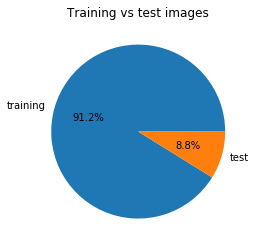

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

training_subdirectories_count = len(get_all_subdirectories(train_directory))
test_subdirectories_count = len(get_all_subdirectories(test_directory))

plt.pie([training_subdirectories_count, test_subdirectories_count], labels=['training', 'test'], autopct='%1.1f%%')
plt.title('Training vs test images')
plt.show()

Above plot is created based on images in *images* directory. <br>
It doesn't take into account how many masks are assigned to one image as we do not have this information for test images.

<h3>Dimensions</h3>

<h4>Overall dimension statistics</h4>

Let's see how width and height differ for training and test sets.

In [7]:
import matplotlib.image as mpimg

def get_dimension_statistics(directory):
    """Get dimensions (width and height) of all images 
    in images subdirectories under subdirectories of given directory.
    
    How does directory tree looks like?
    -directory
        -subdirectory1
            -images
                filename1
        -subdirectory2
            -images
                filename2

    Parameters
    ----------
    directory : directory where to search

    Returns
    -------
    List[str]
            list of subdirectories
    """
    imgs_shapes = [mpimg.imread(directory + dirname + '/images/' + dirname + '.png').shape[:-1] 
                   for dirname in listdir(directory) if isdir(join(directory, dirname))]
    return pd.DataFrame(imgs_shapes, columns = ['Width', 'Height']) 

dimension_statistics_train = get_dimension_statistics(train_directory)
dimension_statistics_test = get_dimension_statistics(test_directory)

print('TRAINING:')
display(dimension_statistics_train.describe())
print('TEST:')
display(dimension_statistics_test.describe())

TRAINING:


,Width,Height
count,670.000000,670.000000
mean,333.991045,378.500000
std,149.474845,204.838693
min,256.000000,256.000000
25%,256.000000,256.000000
50%,256.000000,320.000000
75%,360.000000,360.000000
max,1040.000000,1388.000000


TEST:


,Width,Height
count,65.000000,65.000000
mean,402.676923,393.184615
std,129.082956,189.813386
min,256.000000,161.000000
25%,256.000000,256.000000
50%,512.000000,256.000000
75%,519.000000,640.000000
max,524.000000,696.000000


`Observations: ` <br>
- Mean width is quite similar for test and training images.
- Mean height is much higher for test set.
- Maximum image's dimensions are 2 times larger for training in comparison to test.
- The smallest image for both sets has same width but different height.

<h4>Distribution of unique dimensions</h4>

In [8]:
def get_unique_dimensions(statistics, attribute):
    """Get unique values of given attribute with corresponding counts. 

    Parameters
    ----------
    statistics: dataframe containing column with given attribute
    attribute: attribute to search for

    Returns
    -------
    pd.DataFrame
            Dataframe containing unique attribute's values with corresponding count.
    """
    unique_dimensions = np.unique(statistics[attribute].values, return_counts=True)
    return pd.DataFrame({attribute:unique_dimensions[0],
                         'Count':unique_dimensions[1]})

<h5>Width unique values with corresponding count for training and test data</h5>

In [9]:
print('TRAINING:')
display(get_unique_dimensions(dimension_statistics_train, 'Width'))

TRAINING:


,Width,Count
0,256,446
1,260,5
2,360,91
3,512,13
4,520,92
5,603,6
6,1024,16
7,1040,1


`Observations: ` <br>
- The largest group is group containing containing images with 256 pixels as a width.
- There is one image with 1040 pixels as a width - it can be marked as an outlier.
- There are 16 images with 1024 pixels as a width - each can be divided to 4 images with 256 pixels as a width (if masks will be located on each part) or less (in case that not all images contain at least one mask).
- Images can be also cropped to fixed size (e.g. the smallest one) but **only if** all of them will contain mask (if not, images without nucleuses should be removed).

In [10]:
print('TEST: ')
display(get_unique_dimensions(dimension_statistics_test, 'Width'))

TEST: 


,Width,Count
0,256,24
1,260,4
2,390,1
3,512,16
4,519,8
5,520,8
6,524,4


`Observations: ` <br>
- The largest groups are groups containing images with 256 pixels or 512 pixels as a width.
- There is one image with 390 pixels as a width - it can be marked as an outlier.
- There are 16 images with 512 pixels as a width - each can be divided to 2 images with 256 pixels as a width (if masks will be located on each part) or one (in case that not both images contain at least one mask).
- Images with 519 pixels as a width can be resized to 520 (pixels value can be taken as a statistics for surrounding pixels) or images with 520 pixels as a width can be diminished to 519.
- Images can be also cropped to fixed size (e.g. the smallest one) but **only if** all of them will contain mask (if not, images without nucleuses should be removed).

<h4>Height unique values with corresponding count for training and test data</h4>

In [11]:
print('TRAINING: ')
display(get_unique_dimensions(dimension_statistics_train, 'Height'))

TRAINING: 


,Height,Count
0,256,334
1,320,112
2,347,5
3,360,91
4,640,13
5,696,92
6,1024,16
7,1272,6
8,1388,1


`Observations: ` <br>
- The largest groups is group containing images with 256 pixels as a height.
- There is one image with 1388 pixels as a height - it can be marked as an outlier.
- There are 16 images with 1024 pixels as a height - each can be divided to 4 images with 256 pixels as a height (if masks will be located on each part) or less (in case that not all images contain at least one mask).
- Images can be also cropped to fixed size (e.g. the smallest one) but **only if** all of them will contain mask (if not, images without nucleuses should be removed).

In [12]:
print('TEST: ')
display(get_unique_dimensions(dimension_statistics_test, 'Height'))

TEST: 


,Height,Count
0,161,2
1,162,2
2,239,1
3,253,4
4,256,24
5,347,4
6,348,8
7,640,8
8,680,8
9,696,4


`Observations: ` <br>
- The largest groups is group containing images with 256 pixels as a height.
- It will be hard to divide the rest of images to 2/less than 2/more than 2 to have all with fixed height.
- Images can be also cropped to fixed size (e.g. the smallest one) but **only if** all of them will contain mask (if not, images without nucleuses should be removed).

<h3>Channels visualization</h3>

In first row we can see consecutive channels of colour image, in second - black&white.

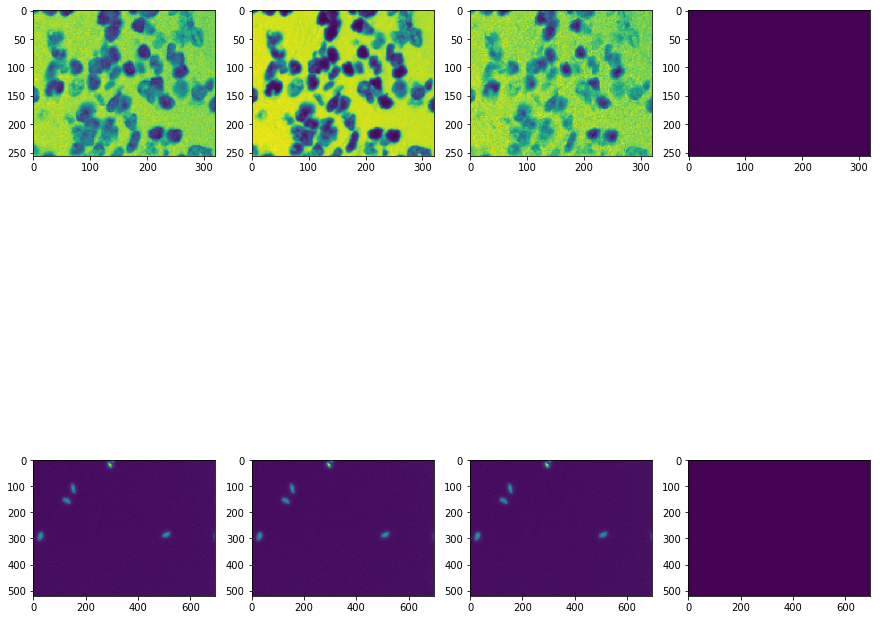

In [13]:
def visualize_channels(paths):
    """Visualize all channels of images under paths.

    Parameters
    ----------
    paths: images paths
    """
    _, ax = plt.subplots(len(paths), 4, figsize=(15,15))
    for img_number in range(len(paths)):
        img = mpimg.imread(paths[img_number])
        for channel in range(img.shape[2]):
            ax[img_number, channel].imshow(img[:,:,channel])
    plt.show()
      
    
random_colour_img_path = train_directory + '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png'
random_bw_img_path = train_directory + '0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e/images/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png'        
visualize_channels([random_colour_img_path, random_bw_img_path])

`Hypothesis: `
- Nothing happens in last channel.

<h4>Are last channels empty?</h4>

As an empty channel I mean channel that doesn't contain important information as all values are set to the same value.

In [14]:
def empty_last_channel(img):
    """Check if last channel of image contains only values equal to 1.

    Parameters
    ----------
    img: image representation

    Returns
    -------
    bool
         True - image has last channel filled with same value (equals to 1)
         False - otherwise
    """
    return np.all(img[..., img.shape[-1] - 1] == 1)

def get_all_imgs_paths(directory):
    """Get all images paths under images subdirectories under given directory.

    How does directory tree looks like?
        -directory
            -subdirectory1
                -images
                    filename1
            -subdirectory2
                -images
                    filename2
    Parameters
    ----------
    directory: directory to search for
    
    Returns
    -------
    List[str]
         Images paths
    """
    return [directory + dirname + '/images/' + dirname + '.png' 
            for dirname in listdir(directory) if isdir(join(directory, dirname))]

def imgs_have_empty_last_channel(directory):
    """Get information about empty last channel 
    for images under images subdirectories under given directory.

    How does directory tree looks like?
        -directory
            -subdirectory1
                -images
                    filename1
            -subdirectory2
                -images
                    filename2
    Parameters
    ----------
    directory: directory to search for
    
    Returns
    -------
    List[bool]
         Information about empty last channel for each image.
    """
    imgs_paths = get_all_imgs_paths(directory)
    return [empty_last_channel(mpimg.imread(img_path)) for img_path in imgs_paths]

def check_if_all_images_have_empty_last_channel(directory):
    """Get information if all images have empty last channel (all values are equal to 1)

    Parameters
    ----------
    directory: directory to search for
    
    Returns
    -------
    bool
         True - all images have empty last channel
         False - otherwise
    """
    return np.all(imgs_have_empty_last_channel(directory))


print('All train images have empty last channel: ', 
      check_if_all_images_have_empty_last_channel(train_directory))

print('All test images have empty last channel: ', 
      check_if_all_images_have_empty_last_channel(test_directory))

All train images have empty last channel:  True
All test images have empty last channel:  False


`Observations: `
- All training samples have last channel filled with same value equal to 1.
- In test dataset we can found images where last channel's values are different than 1.

Let's see why last channel is different for some test images.

In [15]:
test_imgs_paths = get_all_imgs_paths(test_directory)
have_empty_last_channel = [(img_path, empty_last_channel(mpimg.imread(img_path))) 
                           for img_path in test_imgs_paths]

last_channel_df = pd.DataFrame(have_empty_last_channel, 
                               columns=['Path', 'Has last channel with same values'])
last_channel_df.sample(5)

,Path,Has last channel with same values
34,../data/stage1_test/472b1c5ff988dadc209faea924...,False
7,../data/stage1_test/0114f484a16c152baa2d82fdd4...,True
16,../data/stage1_test/336d3e4105766f8ad328a7ee95...,False
64,../data/stage1_test/df40099c6306ca1f47fcc8a62e...,True
27,../data/stage1_test/43a71aeb641faa18742cb82677...,True


`Hypothesis: `
- Equality of last channel's values can be different due to different number of channels.

In [16]:
def check_channels_count(img_path):
    """Get channels count for image

    Parameters
    ----------
    img_path: path to image
    
    Returns
    -------
    int
        Number of image's channels
    """
    return mpimg.imread(img_path).shape[-1]
    
channels_count_where_last_is_empty = [check_channels_count(img_attr[0]) 
                                      for img_attr in have_empty_last_channel if not img_attr[1]]

channels_count_where_last_is_not_empty = [check_channels_count(img_attr[0]) 
                                          for img_attr in have_empty_last_channel if img_attr[1]]

print('Channels count where last channel has different values: ', 
      np.unique(channels_count_where_last_is_not_empty))

print('Channels count where last channel has same values: ', 
      np.unique(channels_count_where_last_is_empty))

Channels count where last channel has different values:  [4]
Channels count where last channel has same values:  [3]


`Observations: `
- In test dataset are images with 4 channels with last one filled with same values.
- In test dataset are images with 3 channels with different values in last one.
- **Last channels can be removed because the don't contain any important information.**

<h3>Colour model</h3>

Some images are RGB, some are black&white.

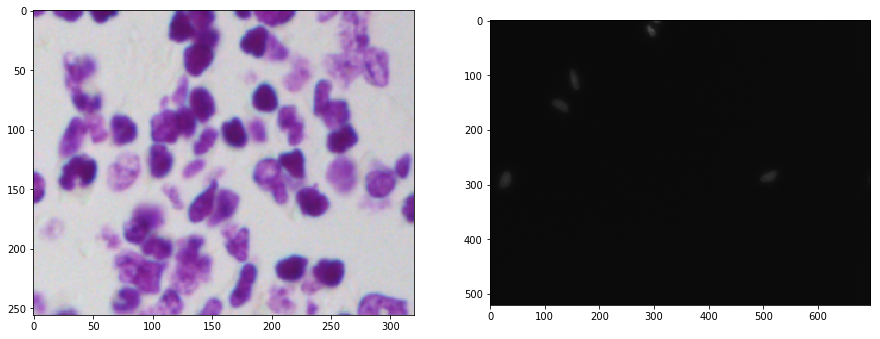

In [17]:
def show_img(paths):
    """Show images under given paths.

    Parameters
    ----------
    paths: images paths
    """
    _, ax = plt.subplots(1, len(paths), figsize=(15,15))
    for img_number in range(len(paths)):
        img = mpimg.imread(paths[img_number])
        ax[img_number].imshow(img)
    plt.show()
    

show_img([random_colour_img_path, random_bw_img_path])

<h4>Black&white vs colour images</h4>
<br>

As we can see in *Channels visualization* section, black&white image channels (1-3) are similar. <br>

`Hypothesis: `
- We can differentiate black&white from colour images using channels similarity.

In [18]:
def compare_channels(img, train):
    """Check equality of all image's channels.

    Parameters
    ----------
    img: image representation
    train: should be set to True if image is from train dataset, False otherwise
    
    Returns
    -------
    List[bool]
        Equality of channels (first element shows result for 0th and 1st channel, 
        second for 1th and 2nd and so on)
    """
    if not train:
        return [np.all(img[:,:,0] == img[:,:,1]), 
                np.all(img[:,:,1] == img[:,:,2])]
    else:
        return [np.all(img[:,:,0] == img[:,:,1]), 
                np.all(img[:,:,1] == img[:,:,2]), 
                np.all(img[:,:,2] == img[:,:,3])]
    

has_same_channels_train = [[img_path, *compare_channels(mpimg.imread(img_path), True)] 
                           for img_path in get_all_imgs_paths(train_directory)]

has_same_channels_train_df = pd.DataFrame(
    has_same_channels_train, 
    columns=['Path', 'Same 0th and 1st channel', 'Same 1st and 2nd channel', 'Same 2nd and 3rd channel'])

has_same_channels_train_df.head()

,Path,Same 0th and 1st channel,Same 1st and 2nd channel,Same 2nd and 3rd channel
0,../data/stage1_train/5cc036b65f7f2d5480e2be111...,True,True,False
1,../data/stage1_train/68f833de9f8c631cedd7031b8...,True,True,False
2,../data/stage1_train/6c67b78e8164801059375ed9a...,False,False,False
3,../data/stage1_train/e1bcb583985325d0ef5f3ef52...,True,True,False
4,../data/stage1_train/a4c44fc5f5bf213e2be6091cc...,False,False,False


In [19]:
has_same_channels_train_df.loc[has_same_channels_train_df['Same 0th and 1st channel']].equals(
    has_same_channels_train_df.loc[has_same_channels_train_df['Same 1st and 2nd channel']])

True

`Observation: `
- 0th, 1st and 2nd channels are equal for some images.

Let's visualize some of them.

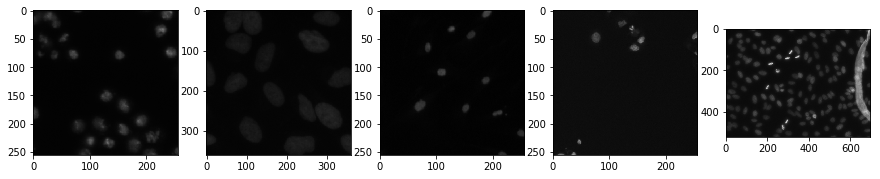

In [20]:
def visualize_images_with_same_channels(paths):
    """Show images with equal values in channels.

    Parameters
    ----------
    paths: paths to images with equal channels
    """
    _, ax = plt.subplots(1, 5, figsize=(15,15))
    for img_number in range(len(paths)):
        img = mpimg.imread(paths[img_number])
        ax[img_number].imshow(img)
    plt.show()
    
paths_to_sample_train_imgs_with_same_channels = has_same_channels_train_df.loc[
    has_same_channels_train_df['Same 0th and 1st channel']].sample(5)['Path'].values

visualize_images_with_same_channels(paths_to_sample_train_imgs_with_same_channels)

`Observation: `
- Images with same values in 0th, 1st and 2nd channels are black&white. <br>

We can now check how many training images are black&white and colour.

<h4> Colour model statistics for training images </h4>

In [21]:
def show_statistics_about_color_models(df):
    """Show how many images are black&white and colour (values and percents)
    """
    black_white_img_df = df.loc[df['Same 0th and 1st channel']]
    color_img_df = df.loc[df['Same 0th and 1st channel'] == False]

    print('Count of black&white training images: ', len(black_white_img_df))
    print('Count of colour training images: ', len(color_img_df))
    print('Black&white images in percents ', 
          len(black_white_img_df) / (len(black_white_img_df) + len(color_img_df)))
    print('Colour images in percents ', 
          len(color_img_df) / (len(black_white_img_df) + len(color_img_df)))

show_statistics_about_color_models(has_same_channels_train_df)

Count of black&white training images:  562
Count of colour training images:  108
Black&white images in percents  0.8388059701492537
Colour images in percents  0.16119402985074627


Saved paths can be helpful in future (e.g. data preprocessing regarding to colour model)

In [22]:
from pathlib import Path

def create_not_existing_directory(directory):
    """Create not existing directory. If directory exists, do nothing.
    Parameters
    ----------
    directory : directory to create

    """
    p = Path(directory)
    if not p.is_dir():
        print(f'Creating directory: {directory} as it does not exist')
        p.mkdir(parents=True, exist_ok=True)

In [23]:
def save_paths_to_bw_images(df, directory):
    """Save paths to bw images (based on same 0th and 1st channel) 
    in csv file (bw_images.csv) under given directory
    
    Parameters
    ----------
    df: dataframe containing columns: 'Path' and 'Same 0th and 1st channel'
    directory : directory where csv file will be created
    """
    create_not_existing_directory(directory)
    df.loc[df['Same 0th and 1st channel']].to_csv(directory + 'bw_images.csv', columns=['Path'], index=False)
    
    
def save_paths_to_colour_images(df, directory):
    """Save paths to colour images (based on same 0th and 1st channel) 
    in csv file (colour_imgs.csv) under given directory
    
    Parameters
    ----------
    df: dataframe containing columns: 'Path' and 'Same 0th and 1st channel'
    directory : directory where csv file will be created
    """
    create_not_existing_directory(directory)
    df.loc[df['Same 0th and 1st channel'] == False].to_csv(directory + 'colour_imgs.csv', columns=['Path'], index=False)

    
colour_model_train_directory = '../data/colour_model/train/'
save_paths_to_bw_images(has_same_channels_train_df, colour_model_train_directory)
save_paths_to_colour_images(has_same_channels_train_df, colour_model_train_directory)

<h4> Colour model statistics for test images </h4>

We can also provide statstics regarding to colour model for test images. <br>
As not all test images have 4 channels, dataframe will contain comparison between channels 0-2.

In [24]:
has_same_channels_test = [[img_path, *compare_channels(mpimg.imread(img_path), False)] 
                           for img_path in get_all_imgs_paths(test_directory)]

has_same_channels_test_df = pd.DataFrame(
    has_same_channels_test, 
    columns=['Path', 'Same 0th and 1st channel', 'Same 1st and 2nd channel'])

has_same_channels_test_df.head()

,Path,Same 0th and 1st channel,Same 1st and 2nd channel
0,../data/stage1_test/519dc0d672d1c295fc69b629af...,True,True
1,../data/stage1_test/44afae184c89e6ba55985b4d34...,False,False
2,../data/stage1_test/5cee644e5ffbef1ba021c7f389...,True,True
3,../data/stage1_test/ade080c6618cbbb0a25680cf84...,True,True
4,../data/stage1_test/17b9bf4356db24967c4677b837...,False,False


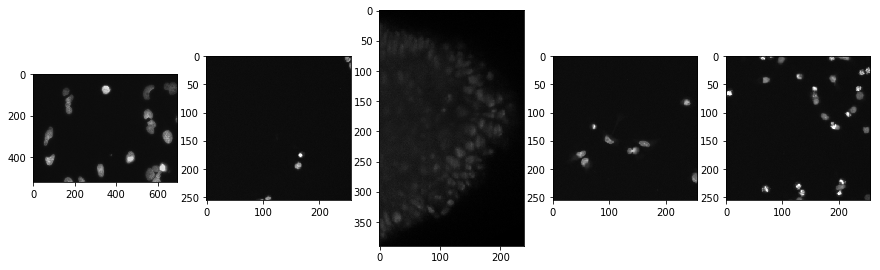

In [25]:
paths_to_sample_test_imgs_with_same_channels = has_same_channels_test_df.loc[
    has_same_channels_test_df['Same 0th and 1st channel']].sample(5)['Path'].values

visualize_images_with_same_channels(paths_to_sample_test_imgs_with_same_channels)

`Observation: `
- As we can see, the thesis about colour model is also true for test images.

In [26]:
show_statistics_about_color_models(has_same_channels_test_df)

Count of black&white training images:  53
Count of colour training images:  12
Black&white images in percents  0.8153846153846154
Colour images in percents  0.18461538461538463


Saved paths can be helpful in future (e.g. data preprocessing regarding to colour model)

In [27]:
colour_model_test_directory = '../data/colour_model/test/'
save_paths_to_bw_images(has_same_channels_test_df, colour_model_test_directory)
save_paths_to_colour_images(has_same_channels_test_df, colour_model_test_directory)

<h3>Masks statistics</h3>

**Note:** These statistics can be provided only for training samples as we do not have masks for test data.

In [28]:
train_directories = get_all_subdirectories(train_directory)
dir_imgs_masks = [[train_directory + directory + '/images/' + directory + '.png', 
                  len(listdir(train_directory + directory + '/images')), 
                  len(listdir(train_directory + directory + '/masks'))
                 ] for directory in train_directories]

masks_df = pd.DataFrame(dir_imgs_masks, columns=['Path', 'Imgages count in images dir', 'Masks count'])
masks_df.describe()

,Imgages count in images dir,Masks count
count,670.0,670.000000
mean,1.0,43.971642
std,0.0,47.962530
min,1.0,1.000000
25%,1.0,15.250000
50%,1.0,27.000000
75%,1.0,54.000000
max,1.0,375.000000


`Observation: `
- All *images* directories contain only one image. 
- There are 670 unique images.
- Maximum number of mask for one image is 375, minimum is 1.
- There is no image without mask (no broken data)

<h4>Histogram of masks count</h4>

Below histogram shows number of masks distribution.

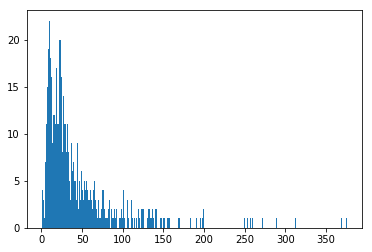

In [29]:
plt.hist(masks_df['Masks count'].values, bins=max(masks_df['Masks count'].values)) 
plt.show()

`Observations:`
- The largest number of masks can be observed between 1 and 200.
- Images with more than 250 (or more than 350) masks can be considered as outliers.

<h4>Count of nucleuses on black&white and colour images</h4>

In [30]:
paths_to_train_black_white_imgs = has_same_channels_train_df.loc[
    has_same_channels_train_df['Same 0th and 1st channel']]['Path'].values

masks_df['Black&white'] = masks_df['Path'].apply(lambda x: x in paths_to_train_black_white_imgs)
masks_df.head()

,Path,Imgages count in images dir,Masks count,Black&white
0,../data/stage1_train/5cc036b65f7f2d5480e2be111...,1,16,True
1,../data/stage1_train/68f833de9f8c631cedd7031b8...,1,32,True
2,../data/stage1_train/6c67b78e8164801059375ed9a...,1,111,False
3,../data/stage1_train/e1bcb583985325d0ef5f3ef52...,1,6,True
4,../data/stage1_train/a4c44fc5f5bf213e2be6091cc...,1,37,False


Let's see statistics about masks for both colour models. <br>

- Black&white

In [31]:
masks_df.loc[masks_df['Black&white']]['Masks count'].describe()

count    562.000000
mean      44.281139
std       50.606299
min        1.000000
25%       15.000000
50%       26.000000
75%       52.000000
max      375.000000
Name: Masks count, dtype: float64

- Colour

In [32]:
masks_df.loc[masks_df['Black&white'] == False]['Masks count'].describe()

count    108.000000
mean      42.361111
std       30.862510
min        2.000000
25%       17.000000
50%       32.500000
75%       63.250000
max      151.000000
Name: Masks count, dtype: float64

`Observations:`
- Mean number of masks is very similar for black&white and colour images.
- Colour images do not contain outliers like 375 masks on one image.
- There are more differences in black&white images (as standard deviation is much larger).

<h4>Masks extensions</h4>

In [33]:
masks_extensions = [listdir(train_directory + directory + '/masks')[0].split('.')[1] 
                    for directory in train_directories]

print('Unique extensions of masks images: ', np.unique(masks_extensions))

Unique extensions of masks images:  ['png']


<h3>How many pixels are considered as a nucleus?</h3>

In [34]:
train_masks_paths = [(train_directory + directory + '/masks/', 
                listdir(train_directory + directory + '/masks')
               ) for directory in train_directories]

train_masks_dirs = [main_path + mask_relative_path for main_path, mask_relative_paths in train_masks_paths 
                    for mask_relative_path in mask_relative_paths]

In [35]:
def get_masks_pixels_statistics(paths):
    """Get statistics about pixels considered as a mask.

    Parameters
    ----------
    paths: paths to masks
    
    Returns
    -------
    List[str, int, int, float]
        List containing path to mask, pixels count per mask, 
        count of all image's pixels and how many percents are considered as a mask
    """
    white_pixel_value = 1
    statistics = []
    for path_to_mask in paths:
        mask_img = mpimg.imread(path_to_mask)
        unique_values, counts = np.unique(mask_img, return_counts=True)
        white_pixels_count = counts[unique_values.tolist().index(white_pixel_value)]
        statistics += [[path_to_mask, 
                        white_pixels_count,
                        mask_img.shape[0] * mask_img.shape[1],
                        white_pixels_count / (mask_img.shape[0] * mask_img.shape[1])]]
    return statistics

In [36]:
pixels_statistics = get_masks_pixels_statistics(train_masks_dirs)
pixels_statistics_df = pd.DataFrame(pixels_statistics, 
                                  columns=['Path to mask', 'Pixels count per mask',
                                           'Count of image pixels', 'Masks pixels in percents'])
pixels_statistics_df.sample(5)

,Path to mask,Pixels count per mask,Count of image pixels,Masks pixels in percents
2537,../data/stage1_train/ce88df7356d9d4a8d5944a937...,76,65536,0.001160
21000,../data/stage1_train/0287e7ee5b007c91ae2bd7628...,369,65536,0.005630
18754,../data/stage1_train/5ddbfba2519484316e4b7ccab...,63,65536,0.000961
27604,../data/stage1_train/5d75a63972ef643efd7c42f20...,309,81920,0.003772
10783,../data/stage1_train/edd36ed822e7ed760ff73e052...,201,65536,0.003067


<h4>Statistics about masks for all images</h4>

In [37]:
pixels_statistics_df[['Pixels count per mask', 'Masks pixels in percents']].describe()

,Pixels count per mask,Masks pixels in percents
count,29461.000000,29461.000000
mean,471.803707,0.003165
std,583.837040,0.004488
min,21.000000,0.000020
25%,118.000000,0.000992
50%,305.000000,0.001724
75%,574.000000,0.003376
max,11037.000000,0.083557


`Observations:`
- It is hard to compare images based on *Pixels count per mask*.
- More meaningful information is *Masks pixels in percents*.
- 0.002% of image's pixels are considered to be the smallest mask (it can be hard to detect masks with this size).
- ~8.36% of image's pixels are considered to be the largest mask.

<h4>Statistics about masks for black&white images</h4>

Firstly, column *Black&white* should be added to dataframe. It will be filled based on information about same values in channels.

In [38]:
black_white_img_directories = [img_path[0 : img_path.find('/images/') + 1] 
                               for img_path in paths_to_train_black_white_imgs]

pixels_statistics_df['Black&white'] = pixels_statistics_df['Path to mask'].apply(
    lambda x: True if x[0 : x.find('/masks/') + 1] in black_white_img_directories else False)

In [39]:
pixels_statistics_df.loc[pixels_statistics_df['Black&white']][['Masks pixels in percents']].describe()

,Masks pixels in percents
count,24886.000000
mean,0.002831
std,0.003988
min,0.000020
25%,0.000906
50%,0.001602
75%,0.002713
max,0.049961


<h4>Statistics about masks for colour images</h4>

In [40]:
pixels_statistics_df.loc[pixels_statistics_df['Black&white'] == False][['Masks pixels in percents']].describe()

,Masks pixels in percents
count,4575.000000
mean,0.004984
std,0.006268
min,0.000256
25%,0.001733
50%,0.003320
75%,0.005688
max,0.083557


`Observations: `
- The smallest masks is 10 times larger on colour image.
- The largest masks is 2 times larger on colour image.
- Masks dimensions are more diverse on colour images.